# 第三次作业：Video Game Sales 电子游戏销售分析
## 相关信息

本代码是北京理工大学计算机学院 2021 数据挖掘课程的课程作业。
+ 项目主页为：[DataMining-Course-of-BIT](https://github.com/tenkeyseven/DataMining-Course-of-BIT)
+ 本次作业详细说明为：[Assignments 2](https://github.com/tenkeyseven/DataMining-Course-of-BIT/tree/main/Assignments-2)

## 选用数据集：
+ [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales): Analyze sales data from more than 16,500 games.

## 处理代码：
+ 对 [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales) 数据集，处理代码为：[video-game-sales.ipynb](./video-game-sales.ipynb)

## 作业要求：
+ 电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等
+ 预测每年电子游戏销售额
+ 可视化应用：如何完整清晰地展示这个销售故事

## 实验过程

### 1.数据读取


In [78]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from rich.progress import track
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv('../Datasets/vgsales.csv')
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

属性类别数: 11
总行数: 16598
示例数据:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 2.数据清洗

In [80]:
data.isnull().sum()[data.isnull().sum()!=0]


Year         271
Publisher     58
dtype: int64

In [81]:
data = data.dropna(how='any')

### 3.1 查看最受欢迎的游戏排行

In [82]:
data_rank = data[['Rank', 'Name']].sort_values(by='Rank')
data_rank.head(10)

,Rank,Name
0,1,Wii Sports
1,2,Super Mario Bros.
2,3,Mario Kart Wii
3,4,Wii Sports Resort
4,5,Pokemon Red/Pokemon Blue
5,6,Tetris
6,7,New Super Mario Bros.
7,8,Wii Play
8,9,New Super Mario Bros. Wii
9,10,Duck Hunt


### 3.2 查看最受欢迎的游戏类型

In [83]:
data_genre=data[['Genre', 'Global_Sales']].groupby('Genre').sum().sort_values(by='Global_Sales', ascending=False)
data_genre.head(10)

,Global_Sales
Genre,
Action,1722.84
Sports,1309.24
Shooter,1026.20
Role-Playing,923.83
Platform,829.13
Misc,789.87
Racing,726.76
Fighting,444.05
Simulation,389.98


### 3.3 查看最受欢迎的发行平台

In [84]:
data_platform=data[['Platform', 'Global_Sales']].groupby('Platform').sum().sort_values(by='Global_Sales', ascending=False)
data_platform.head(10)

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.91
PS,727.39
GBA,305.62
PSP,291.71
PS4,278.10


### 3.4 查看最受欢迎的发行人

In [85]:
data_publisher=data[['Publisher', 'Global_Sales']].groupby('Publisher').sum().sort_values(by='Global_Sales', ascending=False)
data_publisher.head(10)

,Global_Sales
Publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54
Take-Two Interactive,399.30
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.70


### 4.预测每年电子游戏销售额
剔除污点数据之后进行线性回归预测

<AxesSubplot:xlabel='Year'>

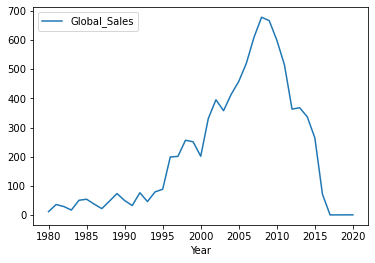

In [86]:
data_year=data[['Year', 'Global_Sales']].groupby('Year').sum().sort_values(by='Year')
data_year.plot()

In [87]:
data_year=data_year.drop([2017, 2020]).reset_index()

In [88]:
x = data_year['Year']
y = data_year['Global_Sales']
x = np.array(x).reshape(-1, 1)
model=LinearRegression()
model.fit(x, y)

LinearRegression()

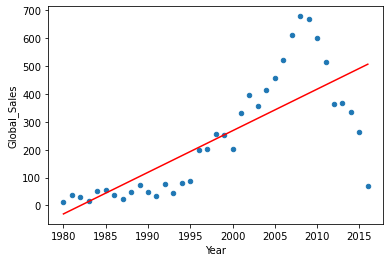

In [89]:
data_year.plot(kind="scatter", x='Year', y='Global_Sales')
plt.plot(x, model.predict(x), 'r-')
plt.show()

### 5.可视化


### 每年销售量最高的某类型的游戏可视化

In [90]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
# year_sale_max

In [91]:
genre = year_sale_max['Genre']

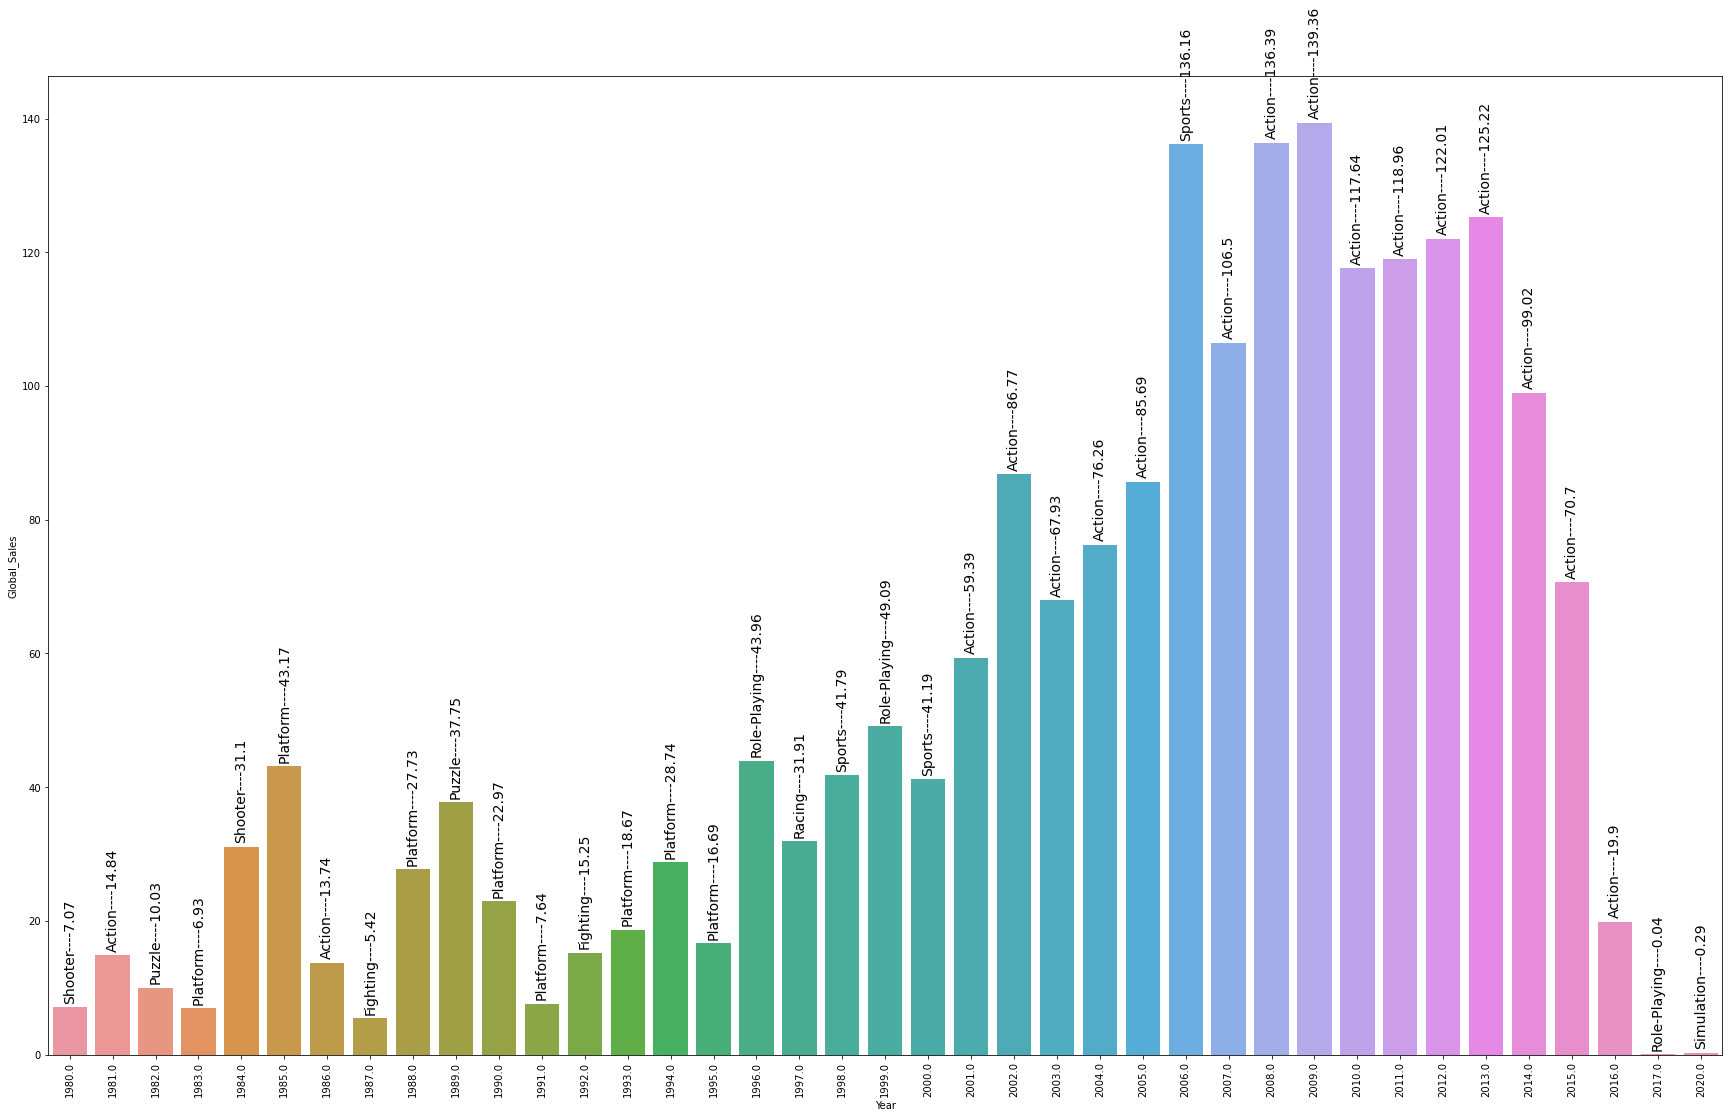

In [92]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

### 哪种类型的游戏全球销量最高

In [93]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

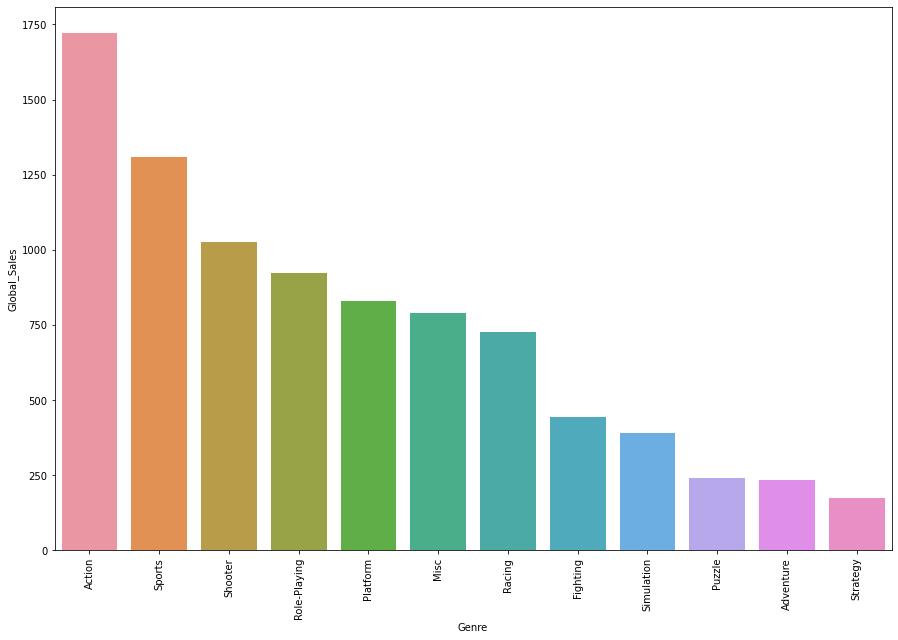

In [94]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)